In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   # Loading the Dataset

In [3]:
df = pd.read_csv(r'C:\Users\PC\Documents\GitHub\E-Commerce_SupplyChain_DataAnalysis\data\interim\cleaned_data.csv')
df

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_state,order_status,order_zipcode,product_card_id,product_category_id,product_image,product_name,product_price,shipping_date_(dateorders),shipping_mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,2018-01-15 11:24:00,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,Shanghái,CLOSED,NaN,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 03:40:00,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,Osaka,COMPLETE,NaN,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-19 01:34:00,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,Australia del Sur,PENDING,NaN,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-20 21:00:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,2016-01-18 20:18:00,Standard Class


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   type                           180519 non-null  object 
 1   days_for_shipping_(real)       180519 non-null  int64  
 2   days_for_shipment_(scheduled)  180519 non-null  int64  
 3   benefit_per_order              180519 non-null  float64
 4   sales_per_customer             180519 non-null  float64
 5   delivery_status                180519 non-null  object 
 6   late_delivery_risk             180519 non-null  int64  
 7   category_id                    180519 non-null  int64  
 8   category_name                  180519 non-null  object 
 9   customer_city                  180519 non-null  object 
 10  customer_email                 180519 non-null  object 
 11  customer_fname                 180519 non-null  object 
 12  customer_id                   

In [9]:
stats = df.describe()
stats

,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,late_delivery_risk,category_id,customer_id,customer_zipcode,department_id,latitude,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total,order_profit_per_order,order_zipcode,product_card_id,product_category_id,product_price
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,141.232550
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,139.732492
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,50.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,59.990002
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,199.990005
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990


In [11]:
df['product_price'].median()

59.99000168

In [16]:
stats.iloc[:,:].apply(np.median)

days_for_shipping_(real)             3.248827
days_for_shipment_(scheduled)        3.465923
benefit_per_order                   48.160002
sales_per_customer                 173.548807
late_delivery_risk                   0.774146
category_id                         30.425725
customer_id                       6574.189747
customer_zipcode                 36731.794018
department_id                        5.221730
latitude                            31.432409
longitude                          -71.609245
order_customer_id                 6574.189747
order_id                         36180.947452
order_item_cardprod_id             659.754882
order_item_discount                 21.232821
order_item_discount_rate             0.100834
order_item_id                    90260.000000
order_item_product_price           140.482521
order_item_profit_ratio              0.315000
order_item_quantity                  1.790545
sales                              201.846047
order_item_total                  

In [17]:
print(df.nunique())

type                                  4
days_for_shipping_(real)              7
days_for_shipment_(scheduled)         4
benefit_per_order                 21998
sales_per_customer                 2927
delivery_status                       4
late_delivery_risk                    2
category_id                          51
category_name                        50
customer_city                       563
customer_email                        1
customer_fname                      782
customer_id                       20652
customer_lname                     1109
customer_password                     1
customer_segment                      3
customer_state                       44
customer_street                    6953
customer_zipcode                    995
department_id                        11
department_name                      11
latitude                          11250
longitude                          4487
market                                5
order_city                         3597


In [ ]:
q1 = df.quantile(0.25)
q1

Days for shipping (real)             2.000000
Days for shipment (scheduled)        2.000000
Benefit per order                    7.000000
Sales per customer                 104.379997
Late_delivery_risk                   0.000000
Category Id                         18.000000
Customer Id                       3258.500000
Customer Zipcode                   725.000000
Department Id                        4.000000
Latitude                            18.265432
Longitude                          -98.446312
Order Customer Id                 3258.500000
Order Id                         18057.000000
Order Item Cardprod Id             403.000000
Order Item Discount                  5.400000
Order Item Discount Rate             0.040000
Order Item Id                    45130.500000
Order Item Product Price            50.000000
Order Item Profit Ratio              0.080000
Order Item Quantity                  1.000000
Sales                              119.980003
Order Item Total                  

In [ ]:
q3 = df.quantile(0.75)
q3

Days for shipping (real)              5.000000
Days for shipment (scheduled)         4.000000
Benefit per order                    64.800003
Sales per customer                  247.399994
Late_delivery_risk                    1.000000
Category Id                          45.000000
Customer Id                        9779.000000
Customer Zipcode                  78207.000000
Department Id                         7.000000
Latitude                             39.279617
Longitude                           -66.370583
Order Customer Id                  9779.000000
Order Id                          54144.000000
Order Item Cardprod Id             1004.000000
Order Item Discount                  29.990000
Order Item Discount Rate              0.160000
Order Item Id                    135389.500000
Order Item Product Price            199.990005
Order Item Profit Ratio               0.360000
Order Item Quantity                   3.000000
Sales                               299.950012
Order Item To

In [23]:
IQR = q3 - q1
IQR

Days for shipping (real)             3.000000
Days for shipment (scheduled)        2.000000
Benefit per order                   57.800003
Sales per customer                 143.019997
Late_delivery_risk                   1.000000
Category Id                         27.000000
Customer Id                       6520.500000
Customer Zipcode                 77482.000000
Department Id                        3.000000
Latitude                            21.014185
Longitude                           32.075729
Order Customer Id                 6520.500000
Order Id                         36087.000000
Order Item Cardprod Id             601.000000
Order Item Discount                 24.590000
Order Item Discount Rate             0.120000
Order Item Id                    90259.000000
Order Item Product Price           149.990005
Order Item Profit Ratio              0.280000
Order Item Quantity                  2.000000
Sales                              179.970009
Order Item Total                  

[Text(0.5, 1.0, 'Total Sales from each Customer')]

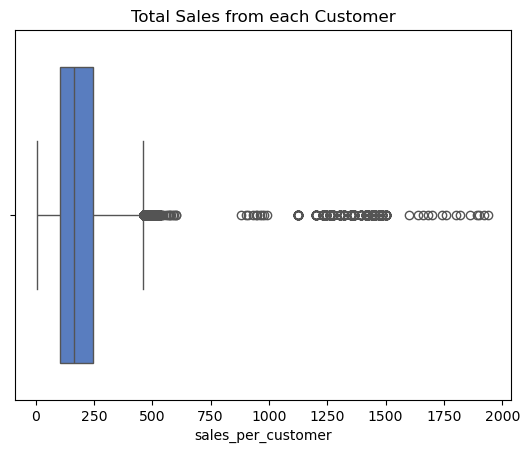

In [39]:
p1 = sns.boxplot(x = df["sales_per_customer"]) 
p1.set(title = "Total Sales from each Customer")

[Text(0.5, 1.0, 'Boxplot of Sales after discount'),
 Text(0.5, 0, 'Sales after discount')]

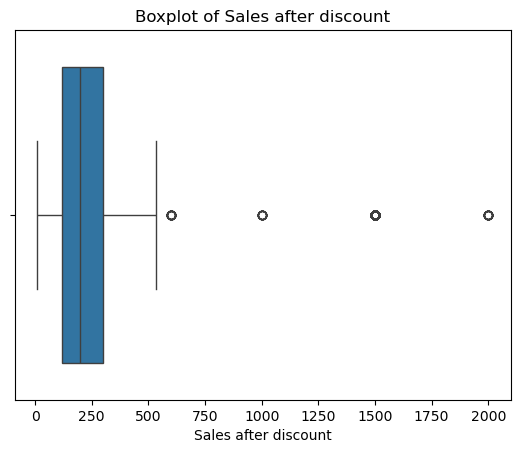

In [21]:
p2  = sns.boxplot(x = df["sales"])    
p2.set(title = "Boxplot of Sales after discount",xlabel ='Sales after discount')

[Text(0.5, 1.0, 'Frequency Distribution of Mode of Payment'),
 Text(0, 0.5, 'Number of Transactions')]

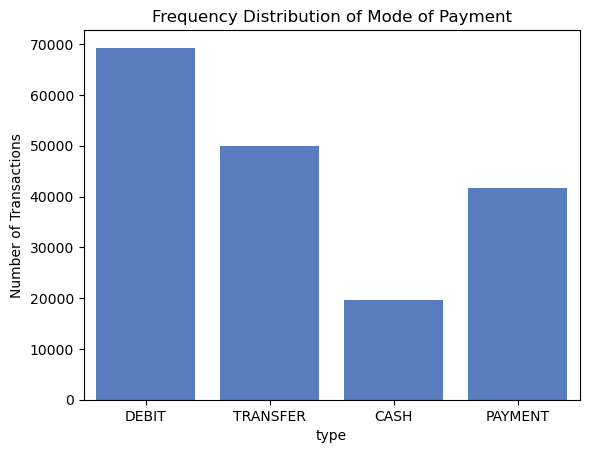

In [40]:
p3 = sns.countplot(x = df["type"]) 
p3.set(title = "Frequency Distribution of Mode of Payment",ylabel = "Number of Transactions")

C:\Users\PC\AppData\Local\Temp\ipykernel_16000\2426515304.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p4.set_xticklabels(p4.get_xticklabels(),rotation = 90)


[Text(0, 0.5, 'Number of products sold '),
 Text(0.5, 1.0, ' Department-wise sales distribution')]

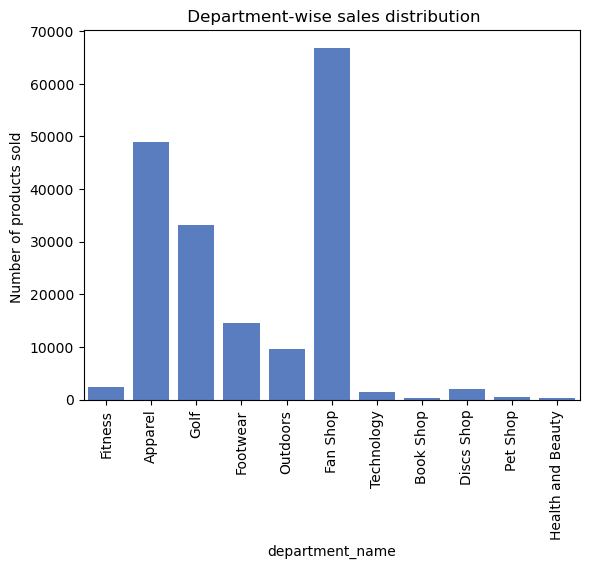

In [41]:
p4 = sns.countplot(x = df["department_name"]) 
p4.set_xticklabels(p4.get_xticklabels(),rotation = 90)
p4.set(ylabel = "Number of products sold ",title = " Department-wise sales distribution")

C:\Users\PC\AppData\Local\Temp\ipykernel_16000\3024118725.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p5 = sns.countplot(x = df["market"], palette="muted")


[Text(0, 0.5, 'Number of products sold'),
 Text(0.5, 1.0, 'Market-wise sales distribution'),
 Text(0.5, 0, 'Market(where each order is delivered)')]

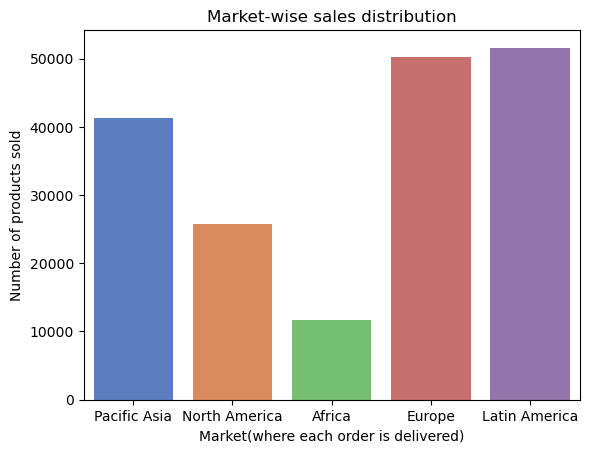

In [44]:
p5 = sns.countplot(x = df["market"], palette="muted")  
p5.set(ylabel = "Number of products sold",title = "Market-wise sales distribution",xlabel = "Market(where each order is delivered)")


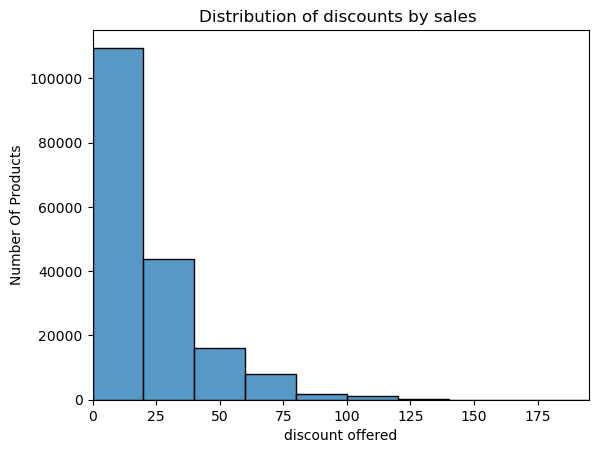

In [33]:
p6 = sns.histplot(x = df["order_item_discount"],bins=25) 
p6.set(title = "Distribution of discounts by sales ",xlabel = "discount offered",ylabel = "Number Of Products")
# Adjust the x-axis range (change limits as needed)
plt.xlim(df["order_item_discount"].quantile(0.001), df["order_item_discount"].quantile(0.999))  # Trim outliers
plt.show()

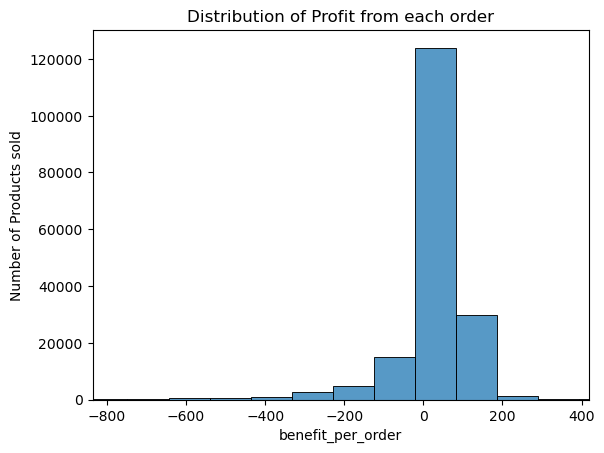

In [30]:
p7 = sns.histplot(x=df["benefit_per_order"], bins=50)
p7.set(title="Distribution of Profit from each order", ylabel="Number of Products sold")
# Adjust the x-axis range (change limits as needed)
plt.xlim(df["benefit_per_order"].quantile(0.001), df["benefit_per_order"].quantile(0.999))  # Trim outliers


plt.show()
